# Case Study on Network Intrusion Detection

# Context:
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes. For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories: • Normal • Anomalous

# Dataset:
https://www.kaggle.com/what0919/intrusion-detection

Data basically represents the packet data for a time duration of 2 seconds. 1-9 Columns: basic features of packet (type 1)

10-22 columns: employ the content features (type 2)

23-31 columns: employ the traffic features with 2 seconds of time window (type 4)

32-41 columns: employ the host based features

Feature name Variable type Type Description

Duration C 1 No. of seconds of the connection

Protocol_type D 1 Type of protocol

                                     E.g.: TCP,UDP ,ICMP
Service D 1 Network service on the destination E.g.: http, telnet

Flag D 1 Normal or error status of the connection

src_bytes C 1 Number of data bytes from source to destination

dst_bytes C 1 Number of data bytes from destination to source

Land D 1 1-connection is from the same host/port: 0-otherwise

Wrong_fragment C 1 No. of ‘wrong’ fragments

Urgent C 1 No of urgent fragments

Hot C 2 The count of access to system directories, creation and execution of programs

Num_failed_logins C 2 No. of failed login attempts

Logged_in D 2 1-successfully logged in 0-otherwise

num_compromised C 2 No. of compromised conditions

Root_shell C 2 1-root shell is obtained;0 otherwise

Su_attempted C 2 1-‘su root’ command attempted;0 otherwise

Num_root C 2 No .of root accesses

num_file_creations C 2 Number of file creation operations

Num_shells C 2 No of shell prompts

Num_access_files C 2 No. of write ,delete and create operations on access control files

Num_outbound_cmds C 2 No. of outbound commands in an ftp session

Is_hot_login D 2 1-the login belongs to the ‘hot’ list 0: otherwise

Count C 3 No. of connections to the same host as the current connection in the past seconds

Srv_count C 3 No of connections to the same host as the current connection in the past 2 seconds

serror_rate C 3 % of connections that have ‘SYN’ errors to the same host

Srv_serror_rate C 3 % of connections that have ‘SYN’ errors to the same service

Rerror_rate C 3 % of connections that have ‘REJ’ errors to the same host

Srv_diff_host_rate C 3 % of connections to different services and to the same host

Dst_host_count C 3 No of connections to the same host to the destination host as the current connection in the past 2 seconds

Dst_host_srv_count C 3 No of connections from the same service to the destination host as the current connection in the past 2 seconds

dst_host_srv_count C 3 No. of connections from the same service to the destination host as the current connection in the past 2 seconds

Dst_host_srv_count C 3 No. of connections from the same service to the destination host as the current connection in the past 2 seconds

Dst_host_same_srv_rate C 3 % of connections from the same service to the destination host

Dst_host_diff_srv_rate C 3 % of connections from the different services to the destination host

Dst_host_same_src_port_rate C 3 % of connections from the port services to the destination host

Dst_host_srv_diff_host_rate C 3 % of connections from the different hosts from the same service to destination host

Dst_host_serror_rate C 3 % of connections that have ‘SYN” errors to same host to the destination host

dst_host_srv_serror_rate C 3 % of connections that have ‘SYN’ errors from the same service to the destination host

Dst_host_rerror_rate C 3 % of connections that have ‘REJ’ errors from the same host to destination host

Dst_host_srv_rerror_rate C 3 % of connections that have ‘REJ’ errors from the same service to the destination host

# Objective:
To detect Network Intrusion using KNN

# importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 

In [2]:
data=pd.read_csv("Network_Intrusion.csv")

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
data.shape

(25192, 42)

In [8]:
 for i in data.columns:
        print(i," :", sum((data[i]=="-") | (data[i]=="?") ))

duration  : 0
protocol_type  : 0
service  : 0
flag  : 0
src_bytes  : 0
dst_bytes  : 0
land  : 0
wrong_fragment  : 0
urgent  : 0
hot  : 0
num_failed_logins  : 0
logged_in  : 0
num_compromised  : 0
root_shell  : 0
su_attempted  : 0
num_root  : 0
num_file_creations  : 0
num_shells  : 0
num_access_files  : 0
num_outbound_cmds  : 0
is_host_login  : 0
is_guest_login  : 0
count  : 0
srv_count  : 0
serror_rate  : 0
srv_serror_rate  : 0
rerror_rate  : 0
srv_rerror_rate  : 0
same_srv_rate  : 0
diff_srv_rate  : 0
srv_diff_host_rate  : 0
dst_host_count  : 0
dst_host_srv_count  : 0
dst_host_same_srv_rate  : 0
dst_host_diff_srv_rate  : 0
dst_host_same_src_port_rate  : 0
dst_host_srv_diff_host_rate  : 0
dst_host_serror_rate  : 0
dst_host_srv_serror_rate  : 0
dst_host_rerror_rate  : 0
dst_host_srv_rerror_rate  : 0
class  : 0


In [9]:
data.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192,25192,25192,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.054104,NaN,NaN,NaN,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,2686.555640,NaN,NaN,NaN,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


<AxesSubplot:ylabel='class'>

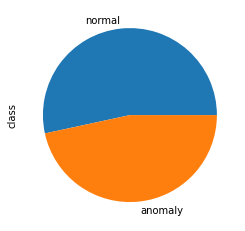

In [10]:
data['class'].value_counts().plot(kind='pie')

In [11]:
le=preprocessing.LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data['protocol_type'] = le.fit_transform(data['protocol_type'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])

In [12]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [13]:
cols=['duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[cols]=scaler.fit_transform(data[cols])

In [15]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-0.113551,1,19,9,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1
1,-0.113551,2,41,9,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1
2,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,0
3,-0.113551,1,22,9,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1
4,-0.113551,1,22,9,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,1,16,2,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,0
25188,-0.113551,1,19,9,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281,0
25189,-0.113551,1,46,1,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,0
25190,-0.113551,1,38,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,0


In [16]:
x=data.drop('class',1)
y=data[['class']]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.3,random_state=123)

In [18]:
print(x_train.shape)
print(x_test.shape)

(17634, 41)
(7558, 41)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier( n_neighbors=3,
    weights='distance')

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
knn.fit(x_train,y_train)
yhat=knn.predict(x_test)

In [23]:
print(metrics.accuracy_score(y_test,yhat))

0.9940460439269648


In [26]:
knn=KNeighborsClassifier( n_neighbors=4,
    weights='distance')
knn.fit(x_train,y_train)
yhat=knn.predict(x_test)
print(metrics.accuracy_score(y_test,yhat))

0.9939137337920084


In [ ]:
score=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_train,y_train))

In [ ]:
plt.plot(range(1,51),score)

#  sqrt of N gives good K values   
np.sqrt(data.shape[0])

In [27]:
np.sqrt(data.shape[0])

158.71987903221196

In [28]:
knn=KNeighborsClassifier(n_neighbors=158)
knn.fit(x_train,y_train)
yhat=knn.predict(x_test)
print(metrics.accuracy_score(y_test,yhat))
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.9630854723471818
0.9664284904162413
0.9630854723471818


# Alternative method of finging K values 

In [30]:
n=list(range(1,51))
neighbors=list(filter(lambda x: x%2!=0,n))
print(neighbors)
score=[]
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_train,y_train))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [35]:
MSE=[1- x for x in score]
best_k=neighbors[MSE.index(min(MSE))]
print(best_k)

1


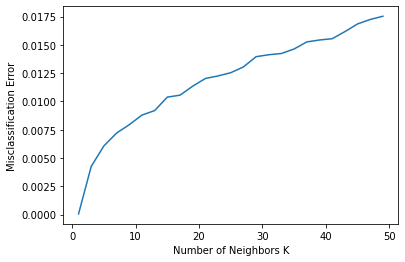

In [36]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [37]:
#Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.9923260121725325
0.9960218796618597
